In [1]:
# Import the required modules
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import MultiplierGate, RGQFTMultiplier, ModularAdderGate
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

import QuantumRingsLib
from QuantumRingsLib import QuantumRingsProvider
from quantumrings.toolkit.qiskit import QrBackendV2
from quantumrings.toolkit.qiskit import QrJobV1

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()
QR_TOKEN = os.getenv("QR_TOKEN")
QR_NAME = os.getenv("QR_NAME")

In [3]:
# Acquire the Quantum Rings Provider
qr_provider = QuantumRingsProvider(token=QR_TOKEN, name=QR_NAME)

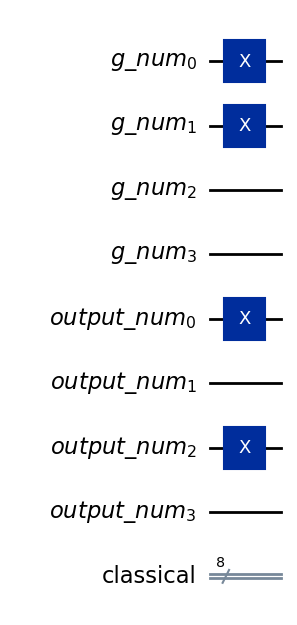

In [ ]:
g_num = QuantumRegister(4, 'g_num')
#start_num = QuantumRegister(4, 'start_num')
output_num = QuantumRegister(4, "output_num")
classical = ClassicalRegister(8, "classical")
circuit = QuantumCircuit(g_num, output_num, classical)
# g_num = 3, start_num = 5
circuit.x(0)
circuit.x(1)
circuit.x(4)
circuit.x(6)
circuit.draw(output="mpl")

In [39]:
def two_exponent(power, num_state_qubits):
    exp_gate = QuantumCircuit(2 * num_state_qubits)
    for i in range(2 ** power):
        exp_gate.append(ModularAdderGate(num_state_qubits=num_state_qubits), range(2 * num_state_qubits))
    return exp_gate.to_gate().control(1)

In [41]:
num_size = 4
q = QuantumRegister(2 * num_size + 3, 'q')
c = ClassicalRegister(4 , 'c')
qc = QuantumCircuit(q, c)

# hadamard gates
qc.h(0)
qc.h(1)
qc.h(2)

# g_num = 3, start_num = 5
qc.x(6)
qc.draw(output="mpl")

qc.barrier()

for power in range(2, num_size + 1):
    qc.append(two_exponent(power, num_size), [power - 2] + list(range(3, qc.num_qubits)) )

qc.measure(range(7, 11), range(4))

qc.draw()

┌───┐ ░                                                              
 q_0: ┤ H ├─░────────■─────────────────────────────────────────────────────
      ├───┤ ░        │                                                     
 q_1: ┤ H ├─░────────┼───────────────■─────────────────────────────────────
      ├───┤ ░        │               │                                     
 q_2: ┤ H ├─░────────┼───────────────┼────────────────■────────────────────
      └───┘ ░ ┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐            
 q_3: ──────░─┤0             ├┤0             ├┤0              ├────────────
            ░ │              ││              ││               │            
 q_4: ──────░─┤1             ├┤1             ├┤1              ├────────────
            ░ │              ││              ││               │            
 q_5: ──────░─┤2             ├┤2             ├┤2              ├────────────
      ┌───┐ ░ │              ││              ││               │            
 q_6: ┤ X ├─░─┤3             ├┤3             ├┤3              ├────────────
      └───┘ ░ │  circuit-545 ││  circuit-824 ││  circuit-1375 │┌─┐         
 q_7: ──────░─┤4             ├┤4             ├┤4              ├┤M├─────────
            ░ │              ││              ││               │└╥┘┌─┐      
 q_8: ──────░─┤5             ├┤5             ├┤5              ├─╫─┤M├──────
            ░ │              ││              ││               │ ║ └╥┘┌─┐   
 q_9: ──────░─┤6             ├┤6             ├┤6              ├─╫──╫─┤M├───
            ░ │              ││              ││               │ ║  ║ └╥┘┌─┐
q_10: ──────░─┤7             ├┤7             ├┤7              ├─╫──╫──╫─┤M├
            ░ └──────────────┘└──────────────┘└───────────────┘ ║  ║  ║ └╥┘
 c: 4/══════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                0  1  2  3

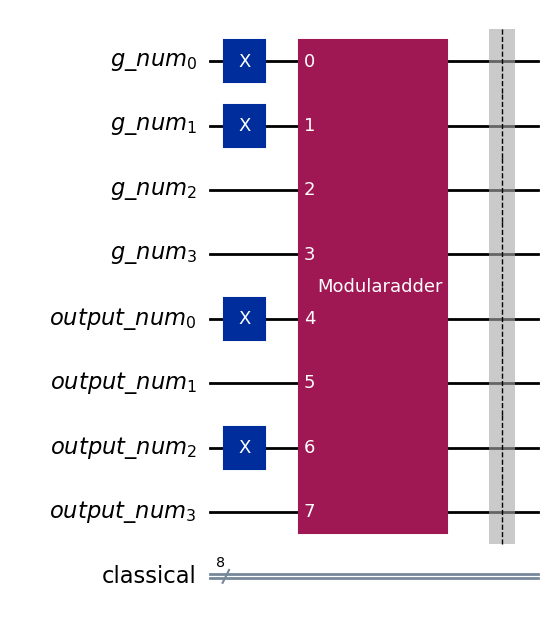

In [ ]:
two

circuit.append(mod_adder, range(8))
circuit.barrier()
#circuit.measure(range(8, 16), range(8)) 
circuit.draw(output="mpl")

In [6]:
# transpile circuit to Quantum Rings backend
qr_backend = QrBackendV2(qr_provider, num_qubits = circuit.num_qubits)
qc_transpiled = transpile(circuit, qr_backend, initial_layout=[i for i in range(0, circuit.num_qubits)])

In [7]:
# Execute the quantum code
job = qr_backend.run(qc_transpiled, shots = 100)

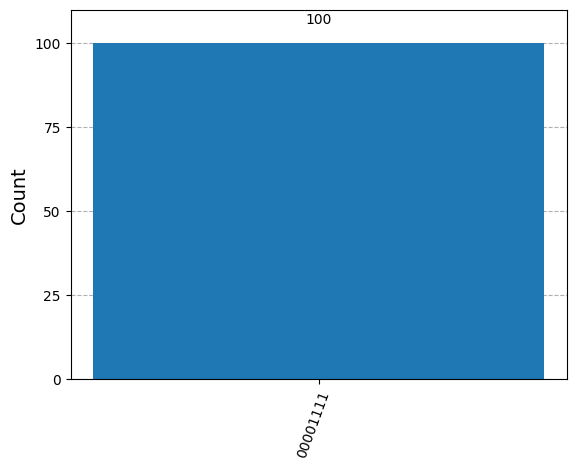

In [8]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)